In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\91831\Desktop\all_data.csv')
df['label']=df['label']-1
df = df.drop(['Location','Date','Sentinel-2','Longitude','Latitude'],axis=1)
lc = df.pop(df.columns[-1])
df.insert(0,'label',lc)
df.to_csv('new_test',index=False)
# Shuffle the rows randomly
df = df.sample(frac=1, random_state=42) 
df.to_csv('new_test.csv', index=False)

C:\Users\91831\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

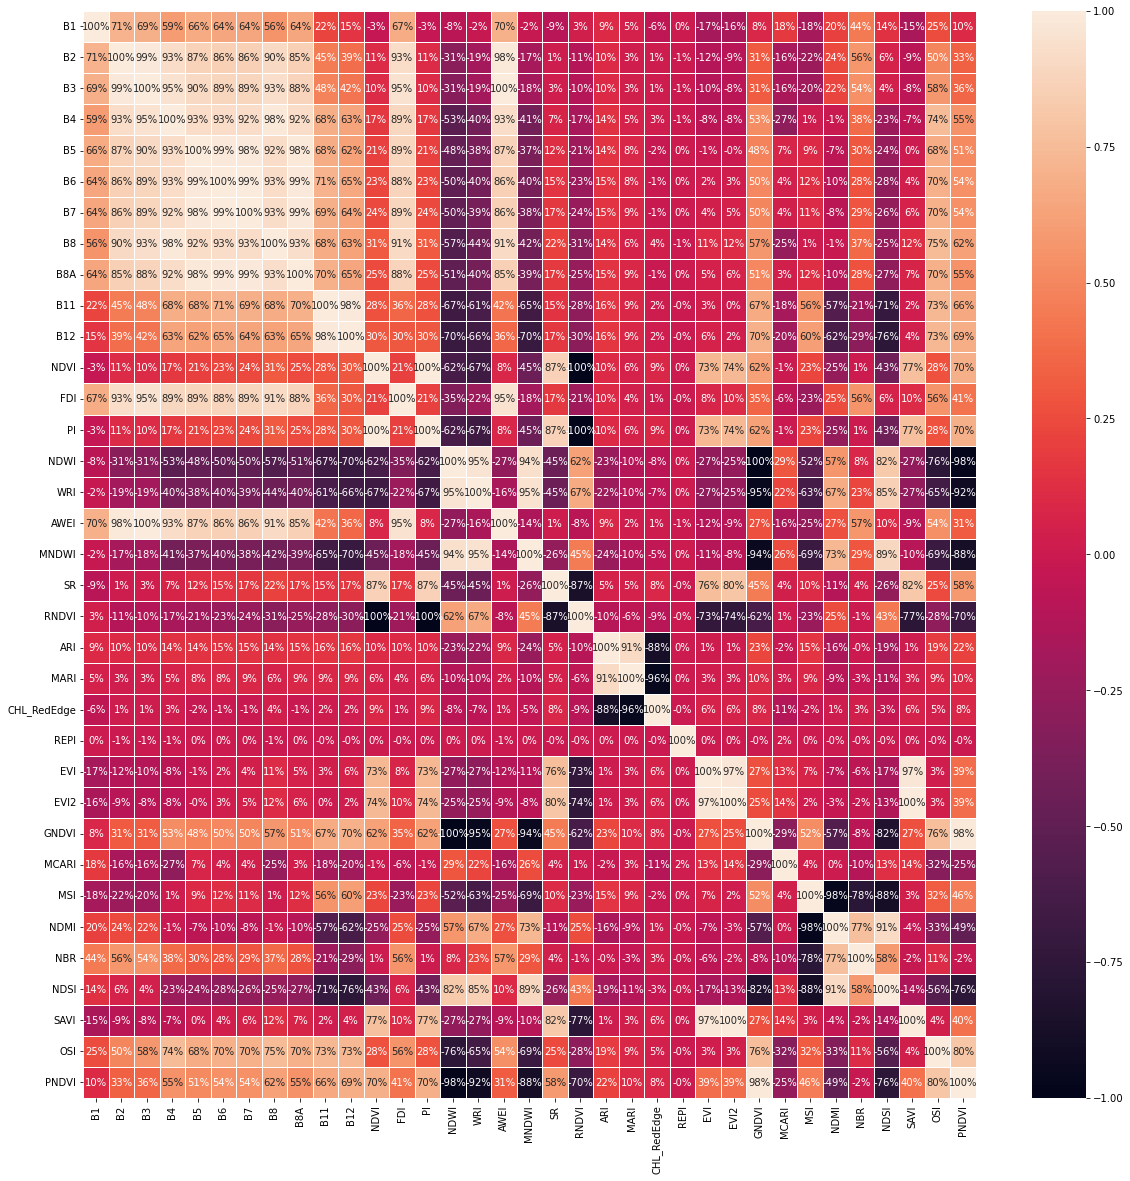

In [2]:
df.iloc[:,1:36].corr()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:36].corr(),linewidth=1,annot=True,fmt=".0%")

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense

In [4]:
x=df.drop('label',axis=1)
y=df['label']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from keras.layers import *
from keras.layers import Convolution2D, MaxPooling2D

In [7]:
import tensorflow as tf
x_train= tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train= tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test= tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test= tf.convert_to_tensor(y_test, dtype=tf.float32)
x_train.shape
y_train.shape

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_train.shape

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))
x_test.shape

(12162, 35, 1)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)

In [9]:
model = Sequential()
model.add(Conv1D(64, 2, padding='same', input_shape = (x_train.shape[1],1), activation = 'sigmoid'))
model.add(Conv1D(64, 2, activation = 'sigmoid', padding='same'))
#model.add(MaxPooling2D(pool_size=(3,3), padding='same'))
model.add(Flatten(input_shape = (x_train.shape[1],64)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(x_train, y_train_encoded, epochs=150,batch_size=64, verbose=1,validation_data=(x_test, y_test_encoded))

Epoch 1/150
761/761 [==============================] - 8s 8ms/step - loss: 0.6674 - accuracy: 0.7573 - val_loss: 0.2708 - val_accuracy: 0.9369
Epoch 2/150
761/761 [==============================] - 5s 7ms/step - loss: 0.2545 - accuracy: 0.9386 - val_loss: 0.1980 - val_accuracy: 0.9410
Epoch 3/150
761/761 [==============================] - 6s 8ms/step - loss: 0.1879 - accuracy: 0.9505 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 4/150
761/761 [==============================] - 7s 9ms/step - loss: 0.1399 - accuracy: 0.9602 - val_loss: 0.1227 - val_accuracy: 0.9637
Epoch 5/150
761/761 [==============================] - 7s 9ms/step - loss: 0.1120 - accuracy: 0.9667 - val_loss: 0.0874 - val_accuracy: 0.9720
Epoch 6/150
761/761 [==============================] - 7s 9ms/step - loss: 0.0992 - accuracy: 0.9697 - val_loss: 0.0788 - val_accuracy: 0.9740
Epoch 7/150
761/761 [==============================] - 7s 9ms/step - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.0686 - val_accuracy: 0.9777

In [10]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

381/381 [==============================] - 1s 2ms/step
Test Accuracy: 0.0029
Test Precision: 1.0000
Test Recall: 0.0029
Test F1-Score: 0.0057
Cohen's Kappa: 0.0000
F2-Score: 0.0036
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.0000


C:\Users\91831\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91831\AppData\Local\Temp/ipykernel_7944/3660336864.py:44: RuntimeWarning: invalid value encountered in divide
  FPR = np.where(mask, FP / (FP + TN), 0)


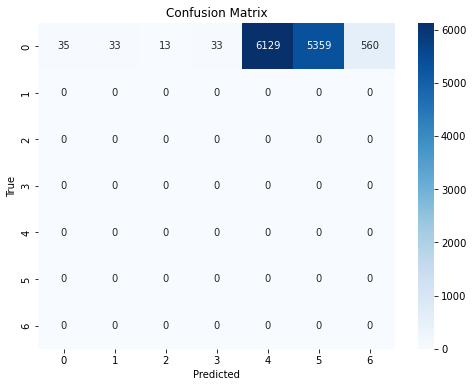

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score, fbeta_score
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-Score: {f1:.4f}')

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

kappa = cohen_kappa_score(y_test_classes, y_pred_classes)
print(f"Cohen's Kappa: {kappa:.4f}")

# Calculate F-beta Score with beta=2
beta = 2  # You can change beta as needed
fbeta = fbeta_score(y_test_classes, y_pred_classes, beta=beta, average='weighted')
print(f'F{beta}-Score: {fbeta:.4f}')

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + np.diag(conf_matrix))
FP = FP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)


mask = (FP + TN) != 0
FPR = np.where(mask, FP / (FP + TN), 0)
FNR = np.where(mask, FN / (FN + FP), 0)

'''FPR = FP / (FP + TN)
FNR = FN / (FN + FP)  # Fixed the calculation'''

print(f'False Positive Rate (FPR): {FPR[0]:.4f}')
print(f'False Negative Rate (FNR): {FNR[0]:.4f}')

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [19]:
scores = model.evaluate(x_test, y_test_encoded, verbose=1)
#scores

print("Accuracy: %.2f%%" % (scores[1]*100))

381/381 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9904
Accuracy: 99.04%
